## Healthcare data analytics

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
## data wrangling
data = data.dropna(subset=['City_Code_Patient', 'Bed Grade']).reset_index(drop=True)

In [4]:
# convert categorical data into ordered categorical types
ordinal_var_dict = {'Hospital_type_code': ['g','f','e','d','c','b','a'],
                    'Hospital_region_code': ['Z', 'Y', 'X'],
                    'Ward_Type': ['U', 'T', 'S', 'R', 'Q', 'P'],
                   'Ward_Facility_Code':['F','E','D','C','B','A'],
                   'Severity of Illness':['Extreme','Moderate','Minor'],
                   'Type of Admission':['Emergency','Urgent','Trauma'],
                   'Age':['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                   'Stay':['More than 100 Days','91-100','81-90','71-80','61-70','51-60','41-50','31-40','21-30',
                           '11-20','0-10']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    data[var] = data[var].astype(ordered_var)

## Number 1

Distribution of Admission deposit

* The Admission deposit is slightly normal.

* The distribution of Admission deposit is Uni-modal

In [5]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


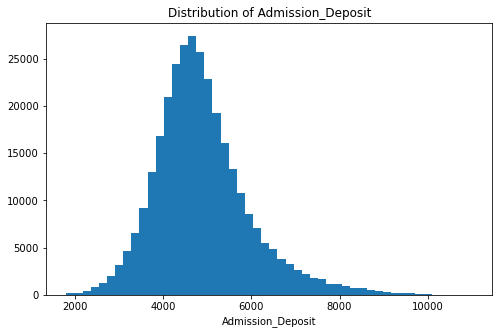

In [6]:
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'Admission_Deposit', bins = 50)
plt.title('Distribution of Admission_Deposit')
plt.xlabel('Admission_Deposit')
plt.show()

**Observation**

* The Admission deposit is slightly normal.

* The distribution of Admission deposit is Uni-modal

### Number 2

Stay Proportion

* 21-30 days stay has the maximum proportion by 27.5%

* 61-70 and 91-100 days stay has the lowesr proportion by 0.9%

In [7]:
stay_counts = data['Stay'].value_counts()
stay_counts

21-30                 86316
11-20                 77095
31-40                 54312
51-60                 34463
0-10                  23250
41-50                 11541
71-80                 10096
More than 100 Days     6548
81-90                  4761
91-100                 2713
61-70                  2698
Name: Stay, dtype: int64

In [8]:
# Get the unique values of the `Stay` column, in the decreasing order of the frequency.
stay_order = stay_counts.index
stay_order

CategoricalIndex(['21-30', '11-20', '31-40', '51-60', '0-10', '41-50', '71-80',
                  'More than 100 Days', '81-90', '91-100', '61-70'],
                 categories=['More than 100 Days', '91-100', '81-90', '71-80', '61-70', '51-60', '41-50', '31-40', ...], ordered=True, dtype='category')

In [9]:
base_color = sns.color_palette()[0]

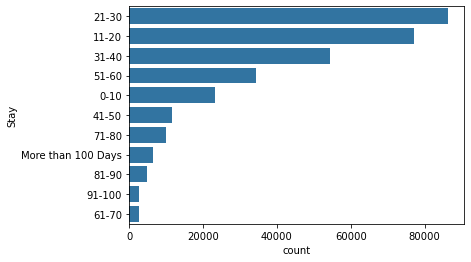

In [10]:
sns.countplot(data=data, y='Stay', color=base_color, order=stay_order);

In [11]:
# Returns the sum of all not-null values in `type` column
n_data = data['Stay'].value_counts().sum()

# Return the highest frequency in the `stay` column
max_stay_count = stay_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_stay_count / n_data
print(max_prop)

0.2750730577163927


In [12]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 4\%
tick_props = np.arange(0, max_prop, 0.04)
tick_props

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24])

In [13]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.04', '0.08', '0.12', '0.16', '0.20', '0.24']

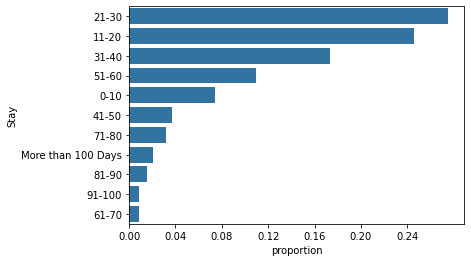

In [14]:
sns.countplot(data=data, y='Stay', color=base_color, order=stay_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_data, tick_names)
plt.xlabel('proportion');

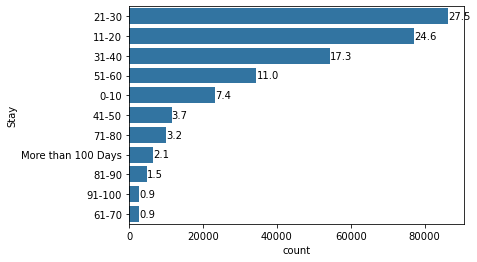

In [15]:
sns.countplot(data=data, y='Stay', color=base_color, order=stay_order);

# Logic to print the proportion text on the bars
for i in range (stay_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = stay_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_data)
    plt.text(count+1, i, pct_string, va='center')

**Observation**

* 21-30 days stay has the maximum proportion by 27.5%

* 61-70 and 91-100 days stay has the lowesr proportion by 0.9%

## Number 3

Average Admission Deposit by Stay

On average Admission deposit per Stay are all above 4000+

In [16]:
avg_dep_per_stay = data.groupby('Stay')['Admission_Deposit'].mean().reset_index().rename(columns={'Admission_Deposit':'Mean_Admission_Deposit'})

In [17]:
avg_dep_per_stay

,Stay,Mean_Admission_Deposit
0,More than 100 Days,4650.187691
1,91-100,4717.868411
2,81-90,4587.864944
3,71-80,4710.176406
4,61-70,4844.482950
5,51-60,4749.617996
6,41-50,4888.903041
7,31-40,4873.306010
8,21-30,5026.906669
9,11-20,4931.358065


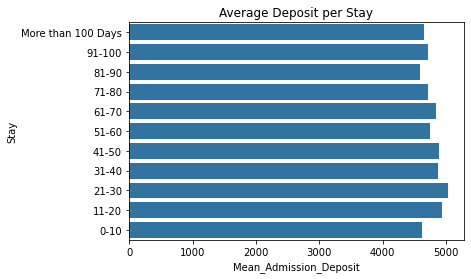

In [18]:
plt.title('Average Deposit per Stay')
sns.barplot(y=avg_dep_per_stay['Stay'], x=avg_dep_per_stay['Mean_Admission_Deposit'], color=base_color)
plt.show();

**Observation**

On average Admission deposit per stay are all above 4000+

In [ ]:
!jupyter nbconvert Project-II-deck.ipynb --to slides --post serve --no-input --no-prompt